# 자전거 대여 그레이언트 부스팅 회귀

In [88]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

In [24]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [43]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes,
                                                    random_state=2)

Decision Tree로 수동적으로 구현

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [45]:
y_train_pred = tree_1.predict(X_train)

In [46]:
y2_train = y_train - y_train_pred

In [47]:
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [48]:
y2_train_pred = tree_2.predict(X_train)
y3_train = y2_train - y2_train_pred
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [49]:
y1_pred = tree_1.predict(X_test)
y2_pred = tree_2.predict(X_test)
y3_pred = tree_3.predict(X_test)

In [50]:
y_pred = y1_pred + y2_pred + y3_pred

In [51]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test, y_pred)**0.5

911.0479538776444

In [52]:
res_1 = y_train - np.mean(y_train)

In [53]:
tree_1.fit(X_train, res_1)
pred_1 = tree_1.predict(X_train)
res_2 = y_train - pred_1

In [55]:
tree_2.fit(X_train, res_2)
pred_2 = tree_2.predict(X_train)
res_3 = y_train - (pred_1 + pred_2)

In [57]:
tree_3.fit(X_train, res_3)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [58]:
from sklearn.metrics import mean_squared_error

pred_all = tree_1.predict(X_test) + tree_2.predict(X_test) + tree_3.predict(X_test)
mean_squared_error(y_test, pred_all, squared=False)

911.0479538776432

# 그레디언트 부스팅 라이브러리 활용

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                random_state=2, learning_rate=1.0)

In [61]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

911.0479538776439

In [62]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30,
                                random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

857.1072323426944

In [63]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300,
                                random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

936.3617413678853

In [64]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

653.7456840231495

In [65]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

In [67]:
for value in learning_rate_values:
  gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, 
                                  random_state=2, learning_rate=value)
  gbr.fit(X_train, y_train)
  y_pred = gbr.predict(X_test)
  rmse = RMSE(y_test, y_pred)**0.5
  print('학습률:', value, ',점수:', rmse)

학습률: 0.001 ,점수: 1633.0261400367258
학습률: 0.01 ,점수: 831.5430182728547
학습률: 0.05 ,점수: 685.0192988749717
학습률: 0.1 ,점수: 653.7456840231495
학습률: 0.15 ,점수: 687.666134269379
학습률: 0.2 ,점수: 664.312804425697
학습률: 0.3 ,점수: 689.4190385930236
학습률: 0.5 ,점수: 693.8856905068778
학습률: 1.0 ,점수: 936.3617413678853


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

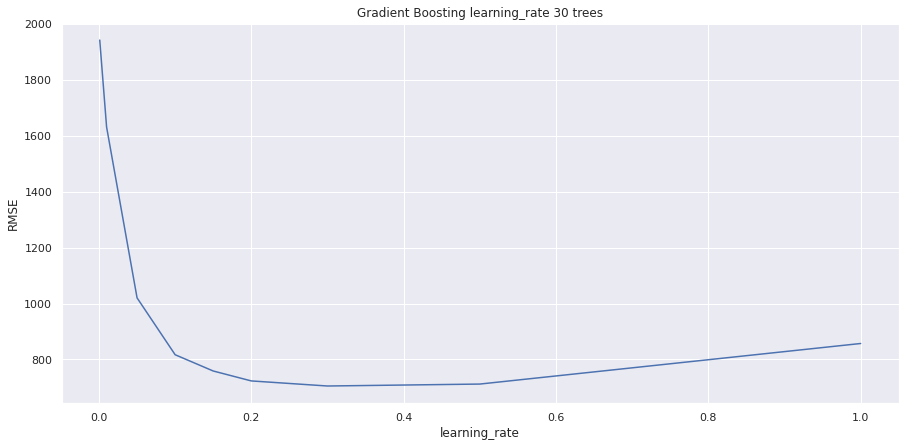

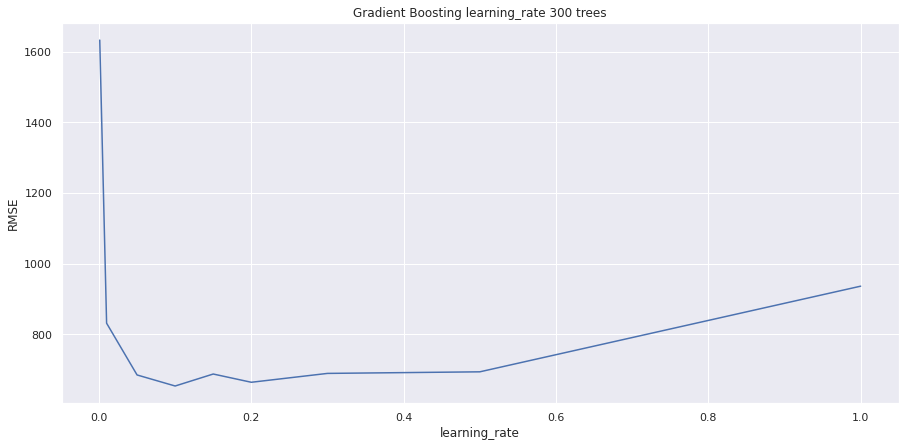

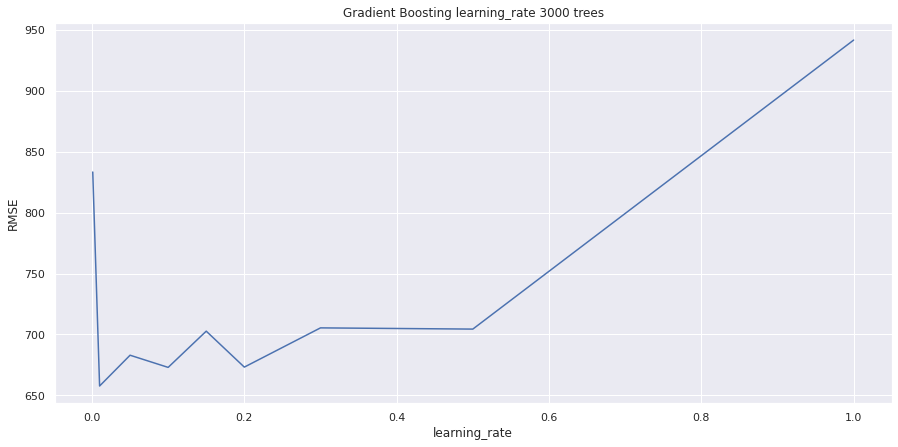

In [70]:
from sklearn.metrics import mean_squared_error

for est in [30, 300, 3000]:
    rmse_scores = []
    for value in learning_rate_values:
        gbr = GradientBoostingRegressor(max_depth=2, n_estimators=est, 
                                        random_state=2, learning_rate=value)
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    plt.figure(figsize=(15,7))
    plt.plot(learning_rate_values, rmse_scores)
    plt.xlabel('learning_rate')
    plt.ylabel('RMSE')
    plt.title('Gradient Boosting learning_rate {} trees'.format(est))
    plt.show()

In [71]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
  gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300,
                                  random_state=2)
  gbr.fit(X_train, y_train)
  y_pred = gbr.predict(X_test)
  rmse = MSE(y_test, y_pred)**0.5
  print('최대 깊이:', depth, ', 점수:', rmse)

최대 깊이: None , 점수: 869.2788645118395
최대 깊이: 1 , 점수: 707.8261886858736
최대 깊이: 2 , 점수: 653.7456840231495
최대 깊이: 3 , 점수: 646.4045923317708
최대 깊이: 4 , 점수: 663.048387855927


In [72]:
gbr.init_

DummyRegressor()

In [73]:
len(gbr.estimators_)

300

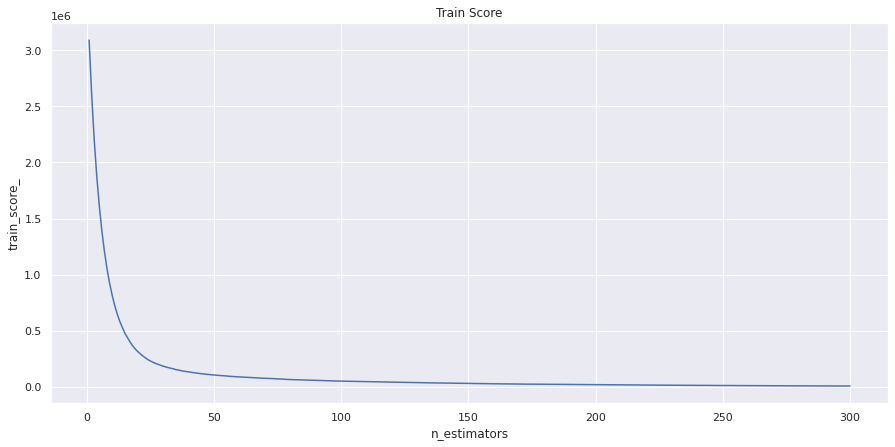

In [74]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, 301), gbr.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

In [75]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
  gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300,
                                  subsample=sample, random_state=2)
  gbr.fit(X_train, y_train)
  y_pred = gbr.predict(X_test)
  rmse = MSE(y_test, y_pred)**0.5
  print('subsample:', sample, ', 점수:', rmse)

subsample: 1 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7 , 점수: 612.9879156983139
subsample: 0.6 , 점수: 622.6385116402317
subsample: 0.5 , 점수: 626.9974073227554


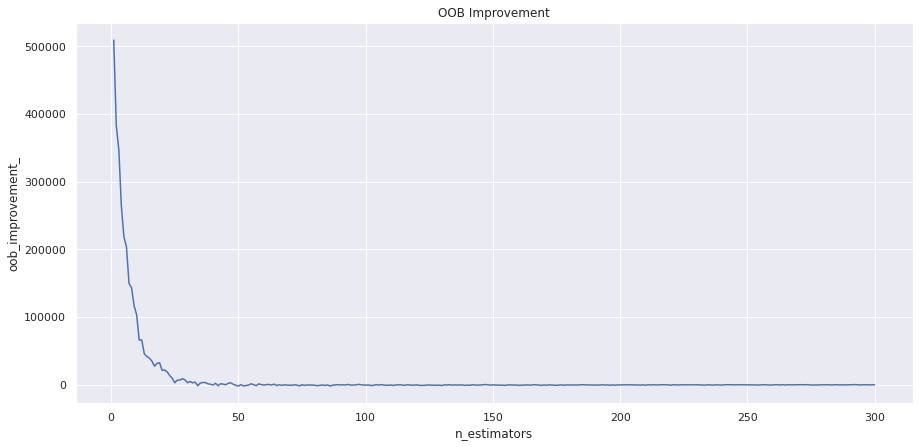

In [77]:
plt.figure(figsize=(15,7))
plt.plot(range(1, 301), gbr.oob_improvement_)
plt.xlabel('n_estimators')
plt.ylabel('oob_improvement_')
plt.title('OOB Improvement')
plt.show()

In [78]:
params = {'subsample': [0.065, 0.7, 0.75],
          'n_estimators': [300, 500, 1000],
          'learning_rate': [0.05,0.75, 0.1]}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
gbr = GradientBoostingRegressor(max_depth=3, random_state=2)

In [80]:
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10,
                              scoring='neg_mean_squared_error',
                              cv=5, n_jobs=-1, random_state=2)

In [81]:
rand_reg.fit(X_train, y_train)
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
print("최상의 매개변수:", best_params)
best_score = np.sqrt(-rand_reg.best_score_)
print("훈련 점수: {:.3f}".format(best_score))
p_pred= best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**0.5
print('테스트 세트 점수: {:.3f}'.format(rmse_test))

최상의 매개변수: {'subsample': 0.75, 'n_estimators': 300, 'learning_rate': 0.1}
훈련 점수: 643.103
테스트 세트 점수: 626.997


In [83]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1600,
                                subsample=0.75, learning_rate=0.02,
                                random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

596.9544588974487

In [89]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02, 
                      subsample=0.75, random_state=2)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
MSE(y_test, y_pred)**0.5

[12:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


584.6690439795171

# 빅 데이터 다루기 (그레이언트 부스팅 vs XGBOOST)

In [90]:
df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [92]:
df.isnull().sum().sum()

0

In [93]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [96]:
import time
start = time.time()
df.info()
end = time.time()
elapsed = end - start
print('\n실행 시간: ' + str(elapsed) + ' 초')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB

실행 시간: 0.04436182975769043 초


In [97]:
%timeit -n 100 -r 3 sum(np.square(range(10000)))

100 loops, best of 3: 2.25 ms per loop


In [98]:
%%timeit -n 100 -r 3
summing = 0
for i in range(10000):
  summing += i**2

100 loops, best of 3: 5.3 ms per loop


In [101]:
start = time.time()
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
end = time.time()
elapsed = end - start
print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9874213836477987
실행 시간: 281.05398392677307 초


In [102]:
start = time.time()
xg_reg = XGBClassifier(n_estimators=100, max_depth=2)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
end = time.time()
elapsed = end - start
print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9913522012578616
실행 시간: 51.416385650634766 초
